# Python Time Series Crash Course_Part 2: Series Tros

## Full Day Workshop for user learn Data Science with Python
### 2017 Dec Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Power Transforms
Data transforms are intended to remove noise and improve the signal in time series forecasting.
It can be very dicult to select a good, or even best, transform for a given prediction problem.
There are many transforms to choose from and each has a dierent mathematical intuition

TypeError: len() of unsized object

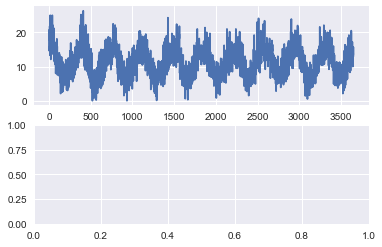

In [21]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

## Airline Passengers Dataset
In this lesson, we will use the Airline Passengers dataset as an example. This dataset describes
the total number of airline passengers over time.

In [61]:
# Read the dataset as a Pandas dataframe in memory
# Note: here, we only read the first 100K rows. Other sampling options are available
dataset_airline_passengers = dataiku.Dataset("airline_passengers")
series = dataset_airline_passengers.get_dataframe(limit=100000)
del series['Month']


In [62]:
series.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


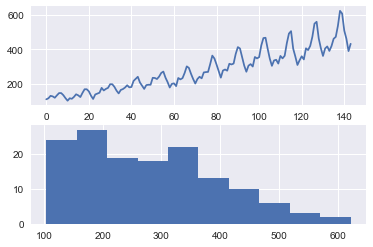

In [50]:
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['Passengers'])
pyplot.show()

The dataset is non-stationary
, meaning that the mean and the variance of the observations
change over time. 

This makes it dicult to model by both classical statistical methods, like
ARIMA, and more sophisticated machine learning methods, like neural networks. 

This is caused
by what appears to be both an increasing $$trend$$and a $$seasonality$$ component.

## Square Root Transform
#### A time series that has a quadratic growth trend can be made linear by taking the square root.
Consider a series of the numbers 1 to
99 squared. The line plot of this series will show a quadratic growth trend and a histogram of
the values will show an exponential distribution with a long trail. The snippet of code below
creates and graphs this series.

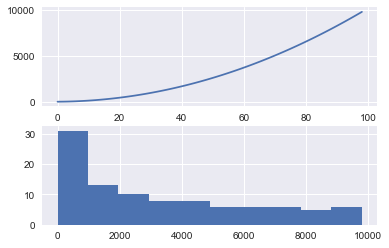

In [22]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

If you see a structure like this in your own time series, you may have a quadratic growth
trend. This can be removed or made linear by taking the inverse operation of the squaring
procedure, which is the square root. Because the example is perfectly quadratic, we would
expect the line plot of the transformed data to show a straight line.

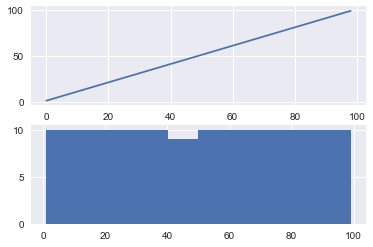

In [24]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

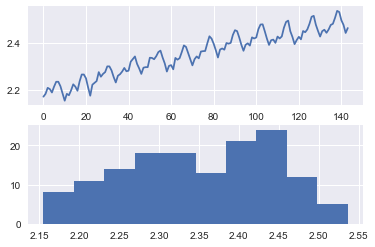

In [44]:
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Log Transform
A class of more extreme trends are $$ exponential $$

, often graphed as a hockey stick.

Time series
with an exponential distribution can be made linear by taking the logarithm of the values. This
is called a log transform. As with the square and square root case above, we can demonstrate
this with a quick example. The code below creates an exponential distribution by raising the
numbers from 1 to 99 to the value e, which is the base of the natural logarithms or Euler's
number (2.718...)f

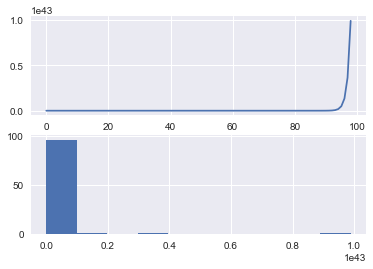

In [26]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Again, we can transform this series back to linear by taking the natural logarithm of the
values. This would make the series linear and the distribution uniform.

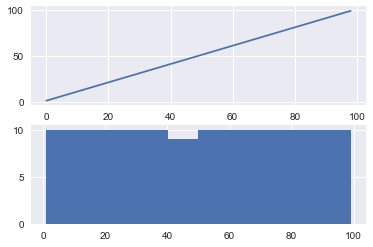

In [27]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

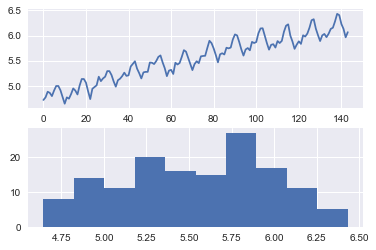

In [65]:
#log transform a time series

dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Assumption for Log Transform
Log transforms are popular with time series data as they are eective at removing exponential
variance. It is important to note that this operation assumes values are positive and non-zero.
It is common to transform observations by adding a xed constant to ensure all input values
meet this requirement. For example:

$$ transform = log(constant + x) $$

Where log is the natural logarithm, transform is the transformed series, constant is a
xed value that lifts all observations above zero, and x is the time series.

# Box-Cox Transform

The square root transform and log transform belong to a class of transforms called power
transforms. The Box-Cox transform2 is a congurable data transform method that supports
both square root and log transform, as well as a suite of related transforms.

More than that, it can be congured to evaluate a suite of transforms automatically and
select a best t. It can be thought of as a power tool to iron out power-based change in
your time series.

The resulting series may be more linear and the resulting distribution more
Gaussian or Uniform, depending on the underlying process that generated it. The scipy.stats
library provides an implementation of the Box-Cox transform. 

The $$boxcox()$$ function3 takes
an argument, called $$lambda$$ , that controls the type of transform to perform.

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [3]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='shampoo-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

from pandas import read_csv
from pandas import datetime
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv(body, header=0, parse_dates=[0], index_col=0,
    squeeze=True, date_parser=parser)
upsampled = series.resample('D').mean()
print(upsampled.head(32))


Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


In [2]:
# The code was removed by DSX for sharing.

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
del dataframe['Month']

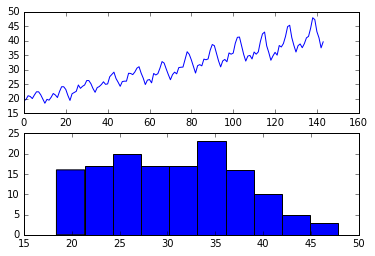

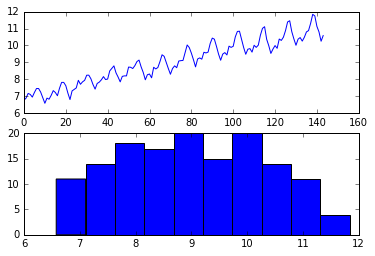

In [6]:
# manually box-cox transform a time series
from pandas import Series
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
dataframe.columns = ['passengers']
dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.5)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

dataframe['passengers'] = boxcox(dataframe['passengers'], lmbda=0.5)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show() 


We can set the lambda parameter to None (the default) and let the function nd a statistically
tuned value. The following example demonstrates this usage, returning both the transformed
dataset and the chosen lambda value.

Lambda: 0.148023


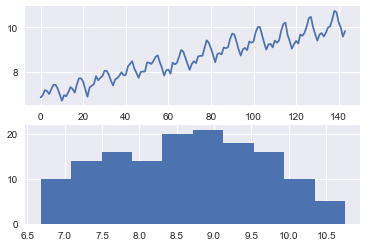

In [68]:
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

Running the example discovers the lambda value of 0.148023. We can see that this is very
close to a lambda value of 0.0, resulting in a log transform and stronger (less than) than 0.5 for
the square root transform.

# Moving Average Smoothing
Moving average smoothing is a naive and eective technique in time series forecasting. It can
be used for data preparation, feature engineering, and even directly for making predictions.

Smoothing is a technique applied to time series to remove the ne-grained variation between
time steps. The hope of smoothing is to remove noise and better expose the signal of the
underlying causal processes. Moving averages are a simple and common type of smoothing
used in time series analysis and time series forecasting. Calculating a moving average involves
creating a new series where the values are comprised of the average of raw observations in the
original time series.

A moving average requires that you specify a window size called the window width. This
denes the number of raw observations used to calculate the moving average value. The moving
part in the moving average refers to the fact that the window dened by the window width is
slid along the time series to calculate the average values in the new series. There are two main
types of moving average that are used: 

Centered and Trailing Moving Average.

### Centered Moving Average
This method requires knowledge of future values, and as such is used on time series analysis
to better understand the dataset. A center moving average can be used as a general method to
remove trend and seasonal components from a time series, a method that we often cannot use
when forecasting.

$$ center ma(t) = mean(obs(t -1); obs(t); obs(t + 1)) $$

### Trailing Moving Average
Trailing moving average only uses historical observations and is used on time series forecasting.
It is the type of moving average that we will focus

$$ trail ma(t) = mean(obs(t - 2); obs(t - 1); obs(t))$$

### Assumption
Calculating a moving average of a time series makes some assumptions about your data. It is
assumed that both trend and seasonal components have been removed from your time series.

There are many methods to remove trends and seasonality from a time series dataset when
forecasting. Two good methods for each are to use the dierencing method and to model the
behavior and explicitly subtract it from the series.


## Moving Average as Data Preparation
Moving average can be used as a data preparation technique to create a smoothed version of
the original dataset. Smoothing is useful as a data preparation technique as it can reduce the
random variation in the observations and better expose the structure of the underlying causal
processes.

The rolling() function1 on the Series Pandas object will automatically group observations
into a window. You can specify the window size, and by default a trailing window is created.
Once the window is created, we can take the mean value, and this is our transformed dataset.
New observations in the future can be just as easily transformed by keeping the raw values
for the last few observations and updating a new average value. To make this concrete, with
a window size of 3, the transformed value at time (t) is calculated as the mean value for the
previous 3 observations (t-2, t-1, t), as follows:

$$ obs(t) = 1/3(obs(t 􀀀 2) + obs(t 􀀀 1) + obs(t)) $$

For the Daily Female Births dataset, the rst moving average would be on January 3rd, as
follows:

In [5]:
series.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

#### 3 days moving average.

obs(t) =
1
/3
 (obs(t 􀀀 2) + obs(t 􀀀 1) + obs(t))
=
1
/3
 (35 + 32 + 30)
= 32:333

/gpfs/fs01/user/sbb6-28ae32a56257b0-666d72869b6d/.local/lib/python2.7/site-packages/pandas/core/series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


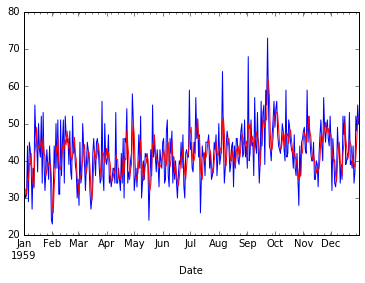

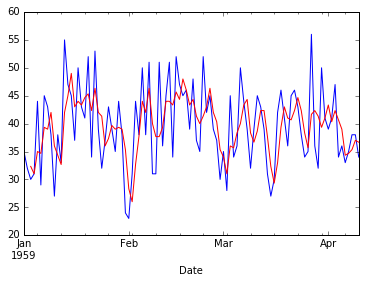

In [3]:

body = client_184c909a0f8b4c90a8ff5679aa933649.get_object(Bucket='singaporetec2017q416683ba55ac54eca8900e5dbf9712cf5',Key='daily-total-female-births.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# moving average smoothing as data preparation
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv(body, header=0)
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()


# Figure 1: The raw observations are plotted with the moving average transform overlaid. 
# Figure 2: To get a better idea of the eect of the transform, we can zoom in and plot the first 100 observations.


## Moving Average as Feature Engineering
The moving average can be used as a source of new information when modeling a time series
forecast as a supervised learning problem. In this case, the moving average is calculated and
added as a new input feature used to predict the next time step. First, a copy of the series must
be shifted forward by one time step. This will represent the input to our prediction problem,
or a lag=1 version of the series. This is a standard supervised learning view of the time series
problem

In [7]:
from pandas import DataFrame
from pandas import concat
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


Running the example creates the new dataset and prints the rst 10 rows. We can see that
the rst 3 rows cannot be used and must be discarded. The rst row of the lag=1 dataset cannot
be used because there are no previous observations to predict the rst observation, therefore a
NaN value is used.

## Moving Average as Prediction
The moving average value can also be used directly to make predictions. 

#### It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. 

The moving average model for predictions can easily be used in a
walk-forward manner. As new observations are made available (e.g. daily), the model can be
updated and a prediction made for the next day. We can implement this manually in Python.

In [9]:
from math import sqrt
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


** Running the example prints the predicted and expected value each time step moving forward,
starting from time step 4 (1959-01-04). Finally, the root mean squared error (RMSE) is reported
for all predictions made **

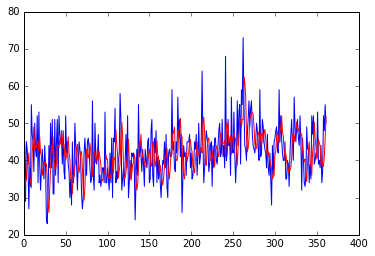

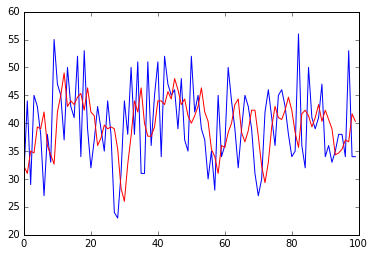

In [10]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()

** The results show a RMSE of nearly 7.834 births per day. The example ends by plotting the
expected test values compared to the predictions. **